Complete the exercises below For **Assignment #5**.

In this exercise, we are building a logistic regression classification model. We'll work with the [Pima Indians Diabetes Database](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database).  

Load the `tidymodels` library. 

In [2]:
library(tidymodels)



Warning message:
“Your system is mis-configured: ‘/var/db/timezone/localtime’ is not a symlink”
Warning message:
“‘/var/db/timezone/localtime’ is not identical to any known timezone file”
── Attaching packages ────────────────────────────────────── tidymodels 1.3.0 ──

✔ broom        1.0.9     ✔ recipes      1.3.1
✔ dials        1.4.1     ✔ rsample      1.3.1
✔ dplyr        1.1.4     ✔ tibble       3.3.0
✔ ggplot2      3.5.2     ✔ tidyr        1.3.1
✔ infer        1.0.9     ✔ tune         1.3.0
✔ modeldata    1.5.0     ✔ workflows    1.2.0
✔ parsnip      1.3.2     ✔ workflowsets 1.1.1
✔ purrr        1.1.0     ✔ yardstick    1.3.2

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ purrr::discard() masks scales::discard()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()
✖ recipes::step()  masks stats::step()



The data is located in your homework directory in the `diabetes.csv` file. Read in the data by running the following cell. We are "splitting" the data into training and testing sets. We will evaluate our model's performance with the test set.

In [6]:
diabetes = readr::read_csv('diabetes.csv') |> mutate(Outcome = factor(Outcome))
head(diabetes)
split = initial_split(diabetes, strata = Outcome)

diabetes_train = training(split)
diabetes_test = testing(split)

Rows: 768 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (9): Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, D...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1
5,116,74,0,0,25.6,0.201,30,0


Glimpse the `diabetes_train` table.

In [5]:
glimpse(diabetes_train)



Rows: 576
Columns: 9
$ Pregnancies              <dbl> 1, 1, 5, 4, 1, 1, 13, 5, 5, 3, 6, 10, 11, 3, …
$ Glucose                  <dbl> 85, 89, 116, 110, 103, 97, 145, 117, 109, 88,…
$ BloodPressure            <dbl> 66, 66, 74, 92, 30, 66, 82, 92, 75, 58, 92, 7…
$ SkinThickness            <dbl> 29, 23, 0, 0, 38, 15, 19, 0, 26, 11, 0, 31, 0…
$ Insulin                  <dbl> 0, 94, 0, 0, 83, 140, 110, 0, 0, 54, 0, 0, 0,…
$ BMI                      <dbl> 26.6, 28.1, 25.6, 37.6, 43.3, 23.2, 22.2, 34.…
$ DiabetesPedigreeFunction <dbl> 0.351, 0.167, 0.201, 0.191, 0.183, 0.487, 0.2…
$ Age                      <dbl> 31, 21, 30, 30, 33, 22, 57, 38, 60, 22, 28, 4…
$ Outcome                  <fct> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …


❓ Which variable is suitable as the "outcome" in a logistic regression model?

**Answer:** 

In [ ]:
The Outcome variable is the suitable choice for the outcome (dependent variable) in a logistic regression model because it is binary

❓ Navigate to [Kaggle page](https://www.kaggle.com/datasets/mathchi/diabetes-data-set) for this dataset. Find descriptions for the `Glucose` and `BMI` columns. Add these descriptions to the [Markdown table](https://www.markdownguide.org/extended-syntax/#tables) below.

| Column name | Description                                                                     |
| :---------- | :------------------------------------------------------------------------------ |
| Glucose     | Plasma glucose concentration a 2 hours in an oral glucose tolerance test        |
| BMI         | Body mass index (weight in kg/(height in m)^2)                                  |

Make a bar chart showing the frequency of each "outcome" in the `Outcome` column from your `diabetes_train` data.

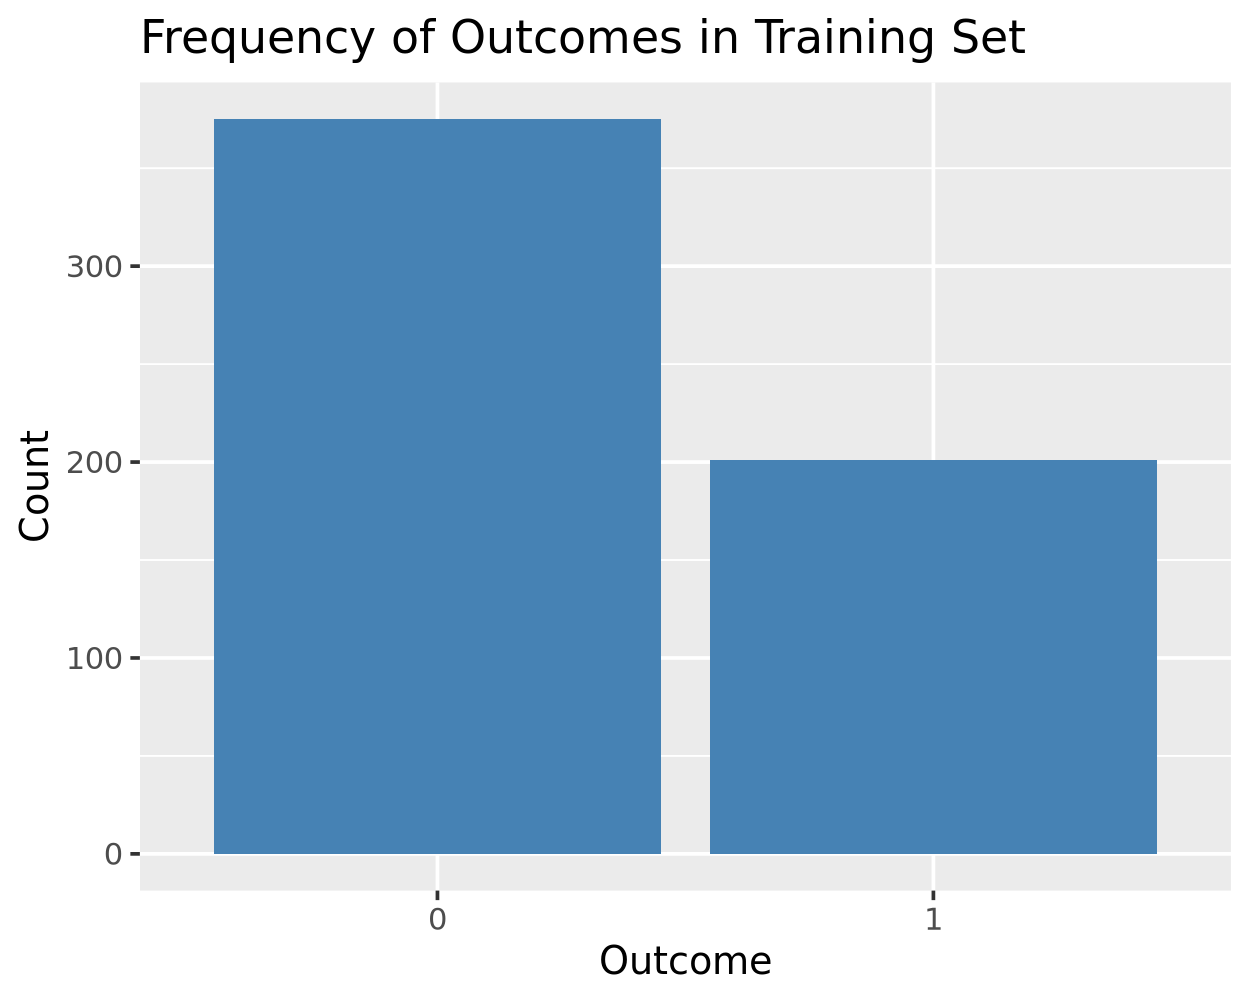

In [12]:
ggplot(diabetes_train, aes(x=Outcome))+
    geom_bar(fill="steelblue")+
    labs(
        title = "Frequency of Outcomes in Training Set",
        x = "Outcome",
        y = "Count"
  )   

❓ Is the data balanced? I.e. do we have equal counts of each outcome?

**Answer:**

In [ ]:
0 is approximately 370, and 1 is 200. So the data is not balanced. There are no equal counts for each outcome



Run the code below to create a table for plotting the predictors we will use in our model: `Glucose` and `BMI`. 

In [13]:
plot_df = diabetes_train |>
    select(Outcome, Glucose, BMI) |>
    pivot_longer(cols = c(Glucose, BMI))

plot_df |> head()

Outcome,name,value
<fct>,<chr>,<dbl>
0,Glucose,85.0
0,BMI,26.6
0,Glucose,116.0
0,BMI,25.6
0,Glucose,110.0
0,BMI,37.6


Using `plot_df`, make a chart showing the relationship of `Glucose` and `BMI` with `Outcome`. 

- use `geom_jitter` for your "geom"
- `facet_wrap` your chart by the `name` variable. (e.g. `facet_wrap(~name, ncol = 2, scales = 'free_x')`)

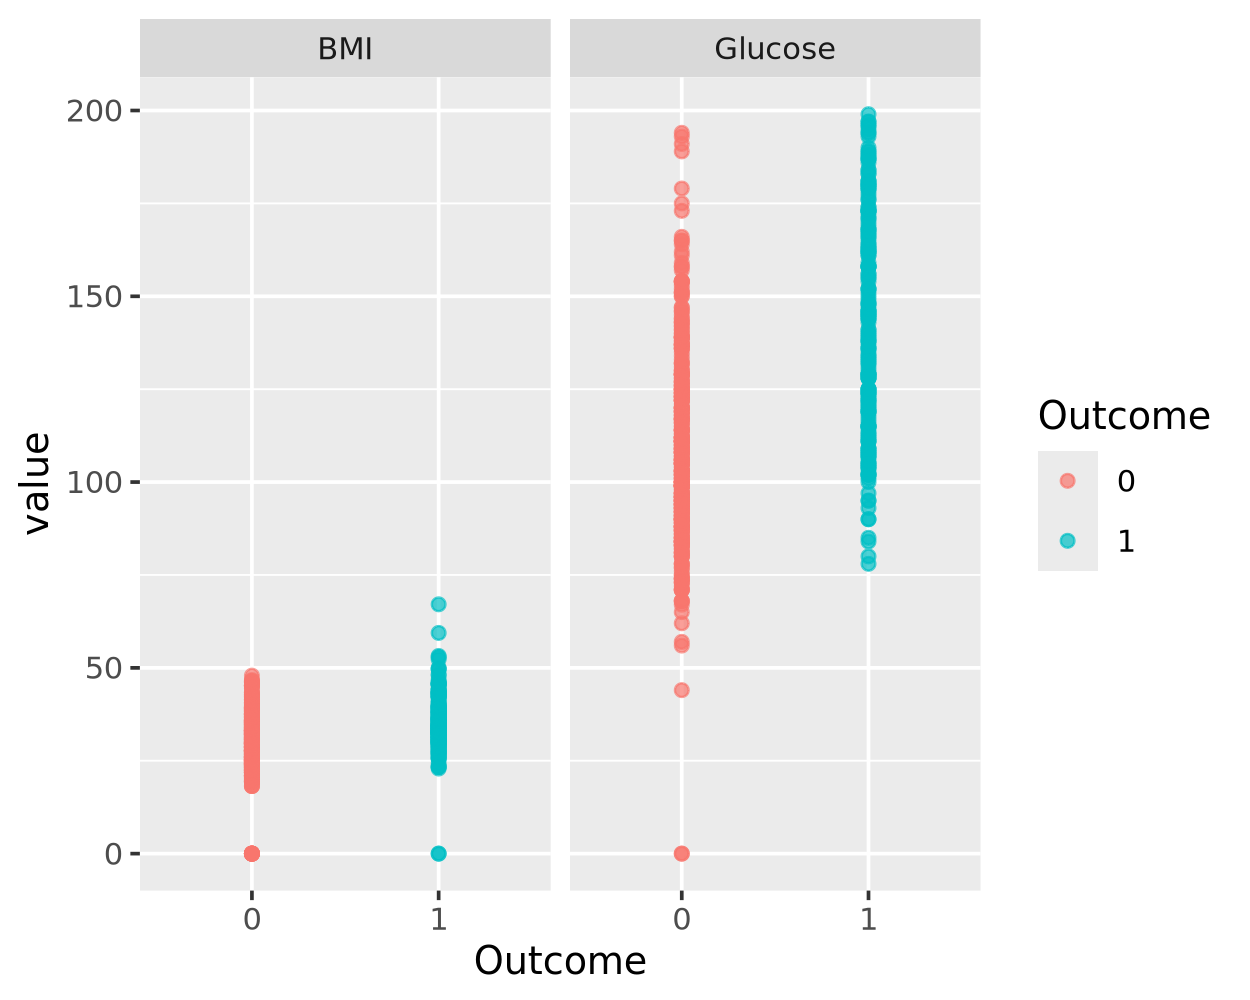

In [27]:
ggplot(plot_df, aes(x = Outcome, y = value, color = Outcome)) +
  geom_point(alpha = 0.7) +
  facet_wrap(~name, ncol = 2, scales = 'free_x')



❓ What happens when you remove the `scales = 'free_x'` argument from the `facet_wrap` function?

**Answer:**

In [ ]:
x-axis scale will be shared across all facets instead of being independent for each facet

Using your training data, build logistic regression model of `Outcome` with `BMI` and `Glucose` as predictors. 
- Use "glm" for you engine
- The formula for your fit function will be `Outcome ~ BMI + Glucose`

In [37]:
logit_spec <- logistic_reg() %>% 
  set_engine("glm") %>% 
  set_mode("classification")

# 2. Create a workflow and add formula
mod_fit <- workflow() %>%
  add_formula(Outcome ~ BMI + Glucose) %>%
  add_model(logit_spec) %>%
  fit(data = diabetes_train)

Using `augment` with your fitted model and the `diabetes_test` data as arguments, create a new dataset called `diabetes_test_wPred` that is the `diabetes_test` table including predictions from your model. 

In [38]:
# 3. Augment test data with predictions
diabetes_test_wPred <- augment(mod_fit, new_data = diabetes_test, type.predict = "class")

head(diabetes_test_wPred)

.pred_class,.pred_0,.pred_1,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0,0.9183801,0.08161994,1,89,66,23,94,28.1,0.167,21,0
0,0.6832354,0.31676458,10,115,0,0,0,35.3,0.134,29,0
1,0.1221068,0.87789325,2,197,70,45,543,30.5,0.158,53,1
1,0.1788995,0.82110052,10,168,74,0,0,38.0,0.537,34,1
0,0.8611082,0.13889181,7,100,0,0,0,30.0,0.484,32,1
0,0.7987727,0.20122733,8,99,84,0,0,35.4,0.388,50,0


Run the code below to generate a confusion matrix for your model predictions. 

(❗️Hint: See Table 4.4 from [*Introduction to Statistical Learning (Version 2)*](https://www.statlearning.com/) for an example confusion matrix.)

In [39]:
diabetes_test_wPred = augment(mod_fit, new_data = diabetes_test)

diabetes_test_wPred |> conf_mat(Outcome, .pred_class)

          Truth
Prediction   0   1
         0 108  34
         1  17  33

❓ Based on the confusion matrix above, 
- How many individuals had diabetes in your test data?
- Of those that actually had diabetes, how many were predicted to have diabetes by your model?
- How many individuals predicted to have diabetes did not have diabetes?

**Answer:**

In [ ]:
1. 34+33 = 67
2. 33
3. 17